In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv('C:\\Users\\Dell\\Desktop\\pp/bigg.csv')

In [3]:
# checking the number of missing values
ev.isnull().sum()

id                          0
clusterId                   0
connectionTime              0
Num.Rep.                    0
disconnectTime              0
donechargingTime            1
SessionLength               0
Avg.Sess.                   0
kWhDelivered                0
Avg.Cons.                   0
sessionId                   0
siteId                      0
spaceID                     0
stationID                   0
timezone                    0
userID                   1199
userInput                1199
Precip Type                 0
temperature                 0
Avg. Humidity               0
Avg Wind Speed(mph)         0
Wind Bearing(degrees)       0
Visibility(km)              0
Loud Cover                  0
Pressure(millibar)          0
Battery_Pack Kwh            0
FastCharge_KmH              0
dtype: int64

In [4]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [5]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,1199
userInput,1199


In [6]:
ev.pop("userID")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userID, Length: 1199, dtype: float64

In [7]:
ev.pop("userInput")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userInput, Length: 1199, dtype: float64

In [8]:
ev.drop(['id','clusterId','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','donechargingTime','timezone','Precip Type','Loud Cover'],axis=1,inplace=True)

In [9]:
ev.corr()

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
Num.Rep.,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,-0.005883,0.000890,0.082359,-0.102735,-0.177679,-0.118644,0.020703,0.008337
SessionLength,-0.071010,1.000000,0.380336,0.349359,0.288598,-0.315319,-0.303165,-0.081812,0.114141,0.003940,0.259002,-0.054652,-0.079983
Avg.Sess.,-0.107489,0.380336,1.000000,0.227223,0.773066,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,0.485590,-0.081316,-0.156699
kWhDelivered,-0.130661,0.349359,0.227223,1.000000,0.231452,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,0.249317,-0.026580,-0.006242
Avg.Cons.,-0.040154,0.288598,0.773066,0.231452,1.000000,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,0.415482,-0.032511,-0.099096
temperature,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,1.000000,0.850414,0.100510,-0.046195,0.259534,-0.574374,0.031727,0.119235
Avg. Humidity,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,0.850414,1.000000,0.396623,-0.181635,0.109862,-0.507359,0.019863,0.127938
Avg Wind Speed(mph),0.082359,-0.081812,-0.266609,-0.025725,-0.548857,0.100510,0.396623,1.000000,-0.256970,-0.121604,-0.133499,0.018198,0.020462
Wind Bearing(degrees),-0.102735,0.114141,0.276224,-0.099936,0.087399,-0.046195,-0.181635,-0.256970,1.000000,-0.049020,-0.112676,-0.056938,-0.071260
Visibility(km),-0.177679,0.003940,-0.143602,0.078063,-0.116635,0.259534,0.109862,-0.121604,-0.049020,1.000000,0.210063,0.057092,0.043039


In [10]:
ev.describe()

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,14.840467,3.546372,2.895396,6.443036,5.465263,30.840901,39.845421,12.729166,188.645538,14.790342,1007.787873,78.156797,584.951626
std,4.004081,2.867130,0.223573,4.871629,0.605820,3.311170,3.334805,1.836852,98.281920,2.129531,3.449437,30.711861,233.955636
min,0.040000,0.010000,2.410000,0.000000,3.620000,24.370000,33.840000,10.240000,10.000000,9.900000,1003.100000,16.700000,0.000000
25%,12.000000,2.130000,2.750000,3.700000,4.920000,28.510000,37.565000,11.040000,120.000000,14.170000,1005.180000,54.000000,380.000000
50%,16.000000,3.010000,2.830000,5.790000,5.590000,31.660000,39.380000,12.490000,195.000000,15.730000,1006.920000,78.000000,594.000000
75%,17.000000,3.965000,2.930000,6.975000,5.810000,33.550000,42.950000,14.780000,271.000000,16.100000,1008.450000,100.000000,788.000000
max,23.900000,55.240000,3.550000,47.810000,6.450000,35.980000,45.100000,15.640000,339.000000,17.300000,1016.850000,206.000000,999.000000


In [11]:
ev.corr()

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
Num.Rep.,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,-0.005883,0.000890,0.082359,-0.102735,-0.177679,-0.118644,0.020703,0.008337
SessionLength,-0.071010,1.000000,0.380336,0.349359,0.288598,-0.315319,-0.303165,-0.081812,0.114141,0.003940,0.259002,-0.054652,-0.079983
Avg.Sess.,-0.107489,0.380336,1.000000,0.227223,0.773066,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,0.485590,-0.081316,-0.156699
kWhDelivered,-0.130661,0.349359,0.227223,1.000000,0.231452,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,0.249317,-0.026580,-0.006242
Avg.Cons.,-0.040154,0.288598,0.773066,0.231452,1.000000,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,0.415482,-0.032511,-0.099096
temperature,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,1.000000,0.850414,0.100510,-0.046195,0.259534,-0.574374,0.031727,0.119235
Avg. Humidity,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,0.850414,1.000000,0.396623,-0.181635,0.109862,-0.507359,0.019863,0.127938
Avg Wind Speed(mph),0.082359,-0.081812,-0.266609,-0.025725,-0.548857,0.100510,0.396623,1.000000,-0.256970,-0.121604,-0.133499,0.018198,0.020462
Wind Bearing(degrees),-0.102735,0.114141,0.276224,-0.099936,0.087399,-0.046195,-0.181635,-0.256970,1.000000,-0.049020,-0.112676,-0.056938,-0.071260
Visibility(km),-0.177679,0.003940,-0.143602,0.078063,-0.116635,0.259534,0.109862,-0.121604,-0.049020,1.000000,0.210063,0.057092,0.043039


C:\Users\Dell\AppData\Local\Temp\ipykernel_14160\3648164053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev['kWhDelivered'],color='pink')


<Axes: xlabel='kWhDelivered', ylabel='Density'>

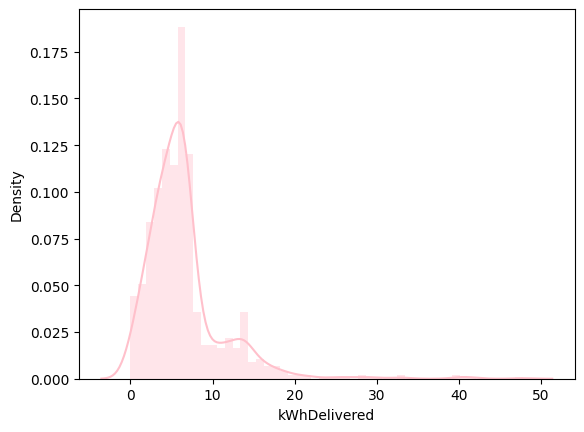

In [12]:
sns.distplot(ev['kWhDelivered'],color='pink')

In [13]:
correlation = ev.corr()
print(correlation['kWhDelivered'])

Num.Rep.                -0.130661
SessionLength            0.349359
Avg.Sess.                0.227223
kWhDelivered             1.000000
Avg.Cons.                0.231452
temperature             -0.262378
Avg. Humidity           -0.233600
Avg Wind Speed(mph)     -0.025725
Wind Bearing(degrees)   -0.099936
Visibility(km)           0.078063
Pressure(millibar)       0.249317
Battery_Pack Kwh        -0.026580
FastCharge_KmH          -0.006242
Name: kWhDelivered, dtype: float64


In [14]:
ev

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18,45.0,260
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18,65.0,345
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18,118.0,670
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18,28.0,215


<Axes: >

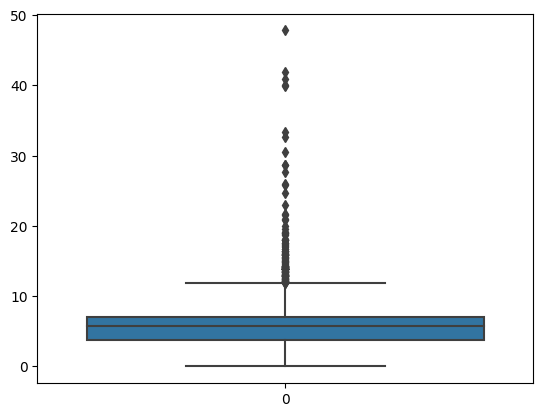

In [15]:
#Boxplot
sns.boxplot(ev['kWhDelivered'])

In [16]:
model=IsolationForest(n_estimators=500,max_samples='auto',contamination=0.04,max_features=1.0)
model.fit(ev[['kWhDelivered']])

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.04, n_estimators=500)

In [17]:
ev['newkWh']=model.decision_function(ev[['kWhDelivered']])
ev['anomaly']=model.predict(ev[['kWhDelivered']])
ev.head(10)

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newkWh,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.126664,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,0.075238,1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,0.190183,1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.185371,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.077285,1
5,14.73,10.56,3.54,7.91,6.44,24.37,34.85,13.54,300,9.9,1004.55,110.0,620,0.129342,1
6,14.80,3.67,3.54,15.29,6.44,24.37,34.85,13.54,300,9.9,1004.55,35.8,220,0.027866,1
7,14.97,4.13,3.53,6.95,6.43,24.37,34.85,13.54,300,9.9,1004.55,45.0,420,0.206600,1
8,15.18,3.08,3.53,2.17,6.43,24.37,34.85,13.54,300,9.9,1004.55,50.0,650,0.121358,1
9,15.20,3.29,3.52,2.44,6.43,24.37,34.85,13.54,300,9.9,1004.55,77.0,540,0.140559,1


In [18]:
outliers_counter = len(ev[ev['anomaly'] == -1])
outliers_counter   

48

In [19]:
ev_data = ev[(ev['kWhDelivered'] <=17)]

In [20]:
ev_data

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newkWh,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.126664,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,0.075238,1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,0.190183,1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.185371,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.077285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18,45.0,260,0.117839,1
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18,65.0,345,0.189320,1
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18,118.0,670,0.177537,1
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18,28.0,215,0.183292,1


#Splitting the features and target 

In [21]:
X = ev_data.drop(['kWhDelivered','newkWh','anomaly'],axis=1)
Y = ev_data['kWhDelivered']

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

In [24]:
standardized_data = scaler.transform(X)

In [25]:
print(standardized_data)

[[-0.93548255 -0.44890018  2.98515362 ... -0.93252635 -0.2707219
   1.52856947]
 [-0.27630606  2.80337287  2.98515362 ... -0.93252635 -1.08456561
  -1.43884791]
 [-0.27379012  2.49225442  2.93994638 ... -0.93252635 -0.10795315
   0.1523759 ]
 ...
 [-0.7165957  -0.0581933  -0.85746171 ... -0.74558311  1.29185804
   0.36740614]
 [-0.46500162 -0.56104753 -2.1232644  ... -0.74558311 -1.63797934
  -1.58936909]
 [-0.7165957  -0.17757596  0.27271927 ... -0.74558311 -0.2707219
   0.92648478]]


In [26]:
X = standardized_data
Y = ev_data['kWhDelivered']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [30]:
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[ 5.3778  5.5589  6.3535  6.1566  8.0955 11.0211  6.5877  4.844   6.3627
  5.395   3.3895  6.3399  4.5193  3.889   8.3845  5.0132  9.9383  3.6891
  6.3253  4.3666  3.0792  6.1439  3.8783 11.0935  8.829   7.7388  6.8304
 11.668   7.2481  7.1667  2.182  11.0212  5.1278 10.7262  6.1586  4.3458
  3.4386  6.1479  4.1735  4.5391  5.9113  6.1603  7.9469  5.3069  3.556
  9.9008  4.5114  3.8619  6.2714  3.8537  6.2211  1.8658  3.807   4.5939
  8.1323  4.183   3.8126  4.9024  4.3398  6.3468  4.3217  8.4012  3.3115
  6.463   5.5756  4.2682  5.9252  3.3815  7.0666  4.1519  3.4659  8.3042
  6.8419  3.4767  6.674  10.0942  5.6276  5.3125  6.5225 12.8295  5.2605
  7.1954  4.9171  8.676   5.1367  5.8981  4.2785 10.9395 11.4672  7.0607
  0.8809  6.2952  4.7324  3.3617  7.841   6.5062  7.0092  5.7885  4.7011
  5.5202  4.8242  3.9348  0.0386  8.7935  4.644   5.383   4.3004  6.3975
  5.1987  6.5572  5.521   0.0146  3.5877  3.8505  4.4937  6.0658  4.5867
  5.7095  0.8714  2.0162  7.2495  4.8343  3.4111  2.

In [32]:
Y_test = list(Y_test)

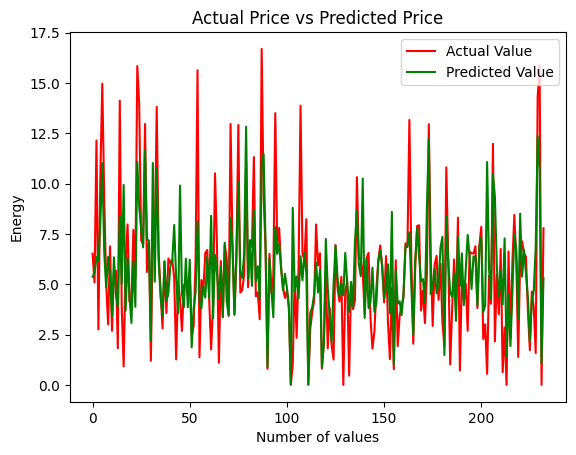

In [33]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [34]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    n = len(actual)
    ape = np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) / 2)
    smape = (1 / n) * np.sum(2 * ape) * 100
    return smape


In [35]:
#Training Scores
training_data_prediction = regressor.predict(X_train)

In [36]:
mean_absolute_error(Y_train, training_data_prediction)

0.6970030075187973

In [37]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.0535876297773072

In [38]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9068547624803925


In [39]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  32.96740067047989


In [40]:
#Test Scores
mean_absolute_error(Y_test, test_data_prediction)

1.622739484978541

In [41]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [42]:
print(rms)

2.4399737661556724


In [43]:
test_d_prediction = regressor.predict(X_train)

In [44]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.46203145255039346


In [45]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [46]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  33.47840125965416


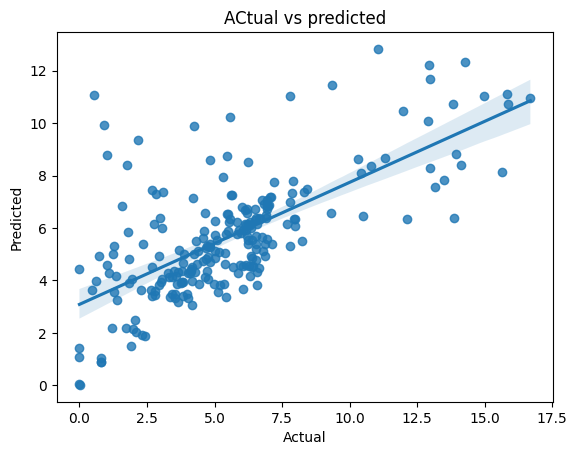

In [47]:
#Visualising
sns.regplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()


#SVM

In [48]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [49]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [50]:
print(y_pred)

[ 5.48377183  5.88670724  5.31360393  6.12706559  6.5306388  12.4921135
  6.97299241  5.98404592  6.60805003  5.17260367  3.20537183  6.69710301
  4.60674489  4.5985308   7.38864524  5.71665914  7.4653437   3.66615832
  7.13085717  4.54263447  4.13726811  6.45160158  5.19311431 10.21117976
 11.13454677  6.77463251  6.41192632 11.21070536  6.87481537  6.86294755
  1.56573232  9.6440995   4.15535867 10.34121065  6.4316067   4.21845345
  3.84274903  6.0011434   4.20201992  3.47428268  5.67196262  6.84053959
  6.48577938  5.60670003  4.95318261  9.74818461  4.51104102  4.16909049
  4.75111821  3.41524423  5.94968864  3.33100567  3.87933661  6.45777518
  9.10056827  5.13296154  2.95302477  4.99489708  4.85176614  6.33971704
  4.64565939 11.19296438  1.51239399  4.12842688  5.18992654  6.04292703
  6.20083352  3.58053745  7.02653611  5.12308091  3.80713438  6.30067809
  7.10920851  2.83901658  6.1002422   8.01082064  6.21623628  4.67762148
  6.89569096  7.77588708  6.9527015   4.96331568  6.

In [51]:
Y_test = list(Y_test)

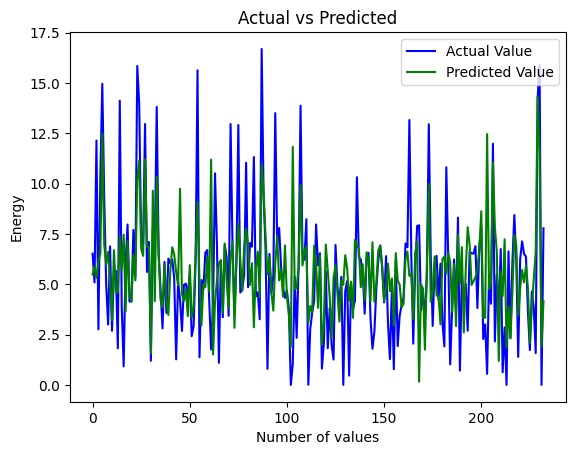

In [52]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [53]:
mean_absolute_error(Y_test, y_pred)

1.9001353544468367

In [54]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [55]:
print(rms)

2.810392326323225


In [56]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.28629215057012625


In [57]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  40.095795231231534


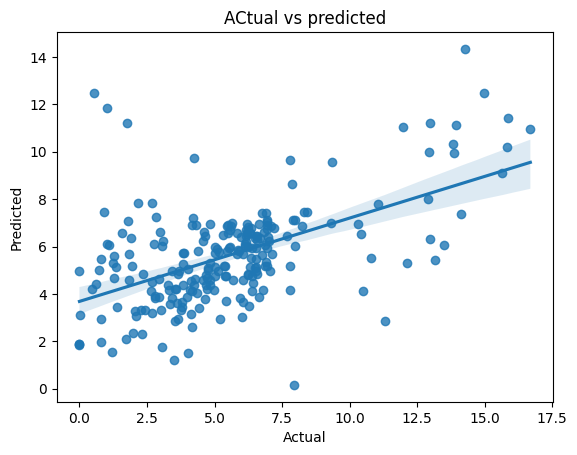

In [58]:
#Visualising
sns.regplot(x=Y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#XGB

In [59]:
# loading the model
xb_model = XGBRegressor()

In [60]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
test_prediction = xb_model.predict(X_test)

In [62]:
print(test_prediction)

[ 5.383334    5.888546    5.347251    5.4843388   7.9703016   9.705862
  7.5926576   4.6312013   5.977126    2.5294387   3.2260427   7.234243
  4.497158    2.7307754   7.399893    3.7444873   9.140105    2.8420014
  6.3031263   6.2024846   3.1417036   6.8861675   4.9054666  11.57974
  6.386358    8.07704     5.875973   12.058914    7.0247283   7.305234
  2.3773544  10.125788    5.3326106  10.914523    6.9957824   3.75877
  2.8414764   6.082379    2.9792244   4.676838    5.7458515   6.1794434
  9.318286    4.791477    4.5176883  10.501551    4.3490114   4.267157
  5.2329793   4.0136743   5.131107    2.3518827   3.601165    4.7111664
  8.1757345   4.322927    3.997516    5.342698    4.938915    6.4699845
  4.378803    9.357707    2.2218223   6.2876945   6.176659    5.6637187
  6.346751    3.2604842   7.2477036   4.4935102   3.7628267   8.002061
  7.469793    3.3998482   6.5540805  10.635214    5.8287387   3.1000438
  5.0427337  11.495959    3.586125    6.2779984   5.465597    7.109748
  

In [63]:
Y_test = list(Y_test)

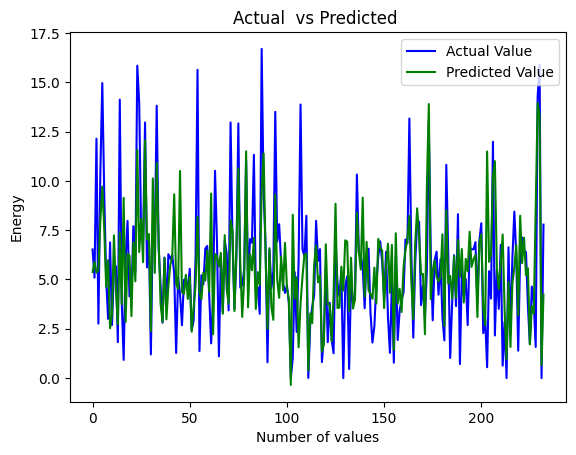

In [64]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [65]:
#Training Scores
training_data_prediction = xb_model.predict(X_train)

In [66]:
mean_absolute_error(Y_train, training_data_prediction)

0.12927832173045511

In [67]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.18285150114453427

In [68]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.99719446049222


In [69]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)


SMAPE score:  5.923514698087985


In [70]:
#Test Scores
mean_absolute_error(Y_test, test_prediction)

1.7626310173534017

In [71]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [72]:
print(rms)

2.6211732438745927


In [73]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.37916238251475853


In [74]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  37.401347911949756


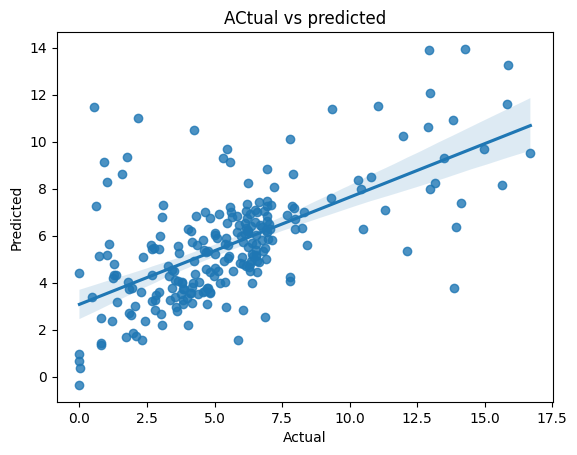

In [75]:
#Visualising
sns.regplot(x=Y_test, y=test_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#ANN 

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [80]:
# layers
model=Sequential()
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [81]:
# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')


In [82]:
# Train the model on the training dataset
model.fit(X_train, Y_train, epochs=1000, batch_size=64, verbose=0)

In [83]:
# Use the trained model to make predictions on the test dataset
Y_pred = model.predict(X_test)


8/8 [==============================] - 0s 3ms/step


In [84]:
print(Y_pred)

[[ 5.841334  ]
 [ 6.393779  ]
 [ 6.0459065 ]
 [ 6.3844028 ]
 [ 7.011961  ]
 [11.815583  ]
 [ 5.143218  ]
 [ 5.6018715 ]
 [ 5.721656  ]
 [ 5.319234  ]
 [ 4.2023287 ]
 [ 6.351009  ]
 [ 3.8166661 ]
 [ 5.432675  ]
 [ 8.187808  ]
 [ 6.175137  ]
 [ 5.464653  ]
 [ 2.0903962 ]
 [ 6.326203  ]
 [ 4.142877  ]
 [ 5.739986  ]
 [ 6.053992  ]
 [ 6.491114  ]
 [10.23191   ]
 [ 8.765028  ]
 [ 6.2868395 ]
 [ 6.5508432 ]
 [ 7.928117  ]
 [ 7.685813  ]
 [ 7.2020206 ]
 [ 2.4502666 ]
 [ 9.790111  ]
 [ 4.899569  ]
 [10.593795  ]
 [ 7.0084505 ]
 [ 4.867438  ]
 [ 3.3160741 ]
 [ 5.647993  ]
 [ 2.8157477 ]
 [ 4.408456  ]
 [ 5.9659348 ]
 [ 7.004552  ]
 [ 6.4709487 ]
 [ 5.2589846 ]
 [ 5.3685884 ]
 [ 9.485885  ]
 [ 5.375023  ]
 [ 4.6890116 ]
 [ 4.657654  ]
 [ 3.0474024 ]
 [ 5.207919  ]
 [ 3.3936892 ]
 [ 3.0034897 ]
 [ 5.3960433 ]
 [ 8.525096  ]
 [ 5.784746  ]
 [ 1.8464862 ]
 [ 5.22764   ]
 [ 5.301651  ]
 [ 5.985451  ]
 [ 4.8900137 ]
 [10.393842  ]
 [ 2.4669514 ]
 [ 5.381879  ]
 [ 5.1259894 ]
 [ 6.4333563 ]
 [ 5.12049

In [85]:
#Training Scores
training_data_prediction = model.predict(X_train)

30/30 [==============================] - 0s 2ms/step


In [86]:
mean_absolute_error(Y_train, training_data_prediction)

1.8202199713538463

In [87]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

2.7312501075838536

In [88]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.3740462126164068


In [89]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean((np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 2) * 100

In [90]:
smape_score = smape(Y_test, training_data_prediction )
print("SMAPE score:", smape_score)

SMAPE score: 55.38006281322144


In [91]:
#Test Scores
mean_absolute_error(Y_test, Y_pred)

1.9643446138539542

In [92]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [93]:
print(rms)

2.7488528247924


In [94]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.3172062337661433


In [95]:
smape_score = smape(Y_test, Y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 55.31471914971756


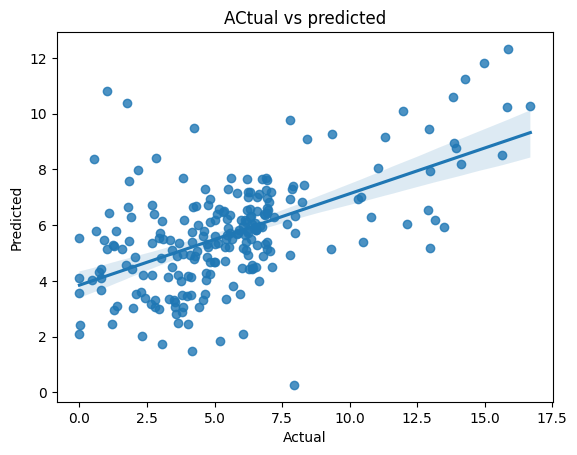

In [96]:
#Visualising
sns.regplot(x=Y_test, y=Y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#KNN

In [97]:
from sklearn.neighbors import KNeighborsRegressor

In [98]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

In [99]:
#Train Scores
training_data_prediction = knn.predict(X_train)

In [100]:
mean_absolute_error(Y_train, training_data_prediction)

1.9276541353383458

In [101]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

2.689457731071088

In [102]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.3930557871697742


In [103]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 36.39728118115928


In [104]:
#test Scores
mean_absolute_error(Y_test, knn_pred)

2.1272875536480687

In [105]:
sqrt(mean_squared_error(Y_test, knn_pred))

2.9396890641684226

In [106]:
# R squared error
error_score = metrics.r2_score(Y_test, knn_pred)
print("R squared error : ", error_score)

R squared error :  0.21911089270412532


In [107]:
smape_score = smape(Y_test, knn_pred)
print("SMAPE score:", smape_score)

SMAPE score: 42.78127030544926


In [108]:
from sklearn.ensemble import AdaBoostRegressor

In [109]:
k = 9
knn = KNeighborsRegressor(n_neighbors=k)
adaboost = AdaBoostRegressor(estimator=knn, n_estimators=50, learning_rate=0.1)
adaboost.fit(X_train, Y_train)
ada_pred = adaboost.predict(X_test)

In [110]:
#Train Scores
training_data_prediction = adaboost.predict(X_train)

In [111]:
mean_absolute_error(Y_train, training_data_prediction)

2.1246664279746987

In [112]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

2.7868950892298963

In [113]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.3482807196660015


In [114]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 39.59282023546195


In [115]:
#Test Scores
mean_absolute_error(Y_test, ada_pred)

2.227372436814497

In [116]:
sqrt(mean_squared_error(Y_test, ada_pred))

3.0384605311233877

In [117]:
# R squared error
error_score = metrics.r2_score(Y_test, ada_pred)
print("R squared error : ", error_score)

R squared error :  0.16575469738059478


In [118]:
smape_score = smape(Y_test, ada_pred)
print("SMAPE score:", smape_score)

SMAPE score: 43.41225731309255


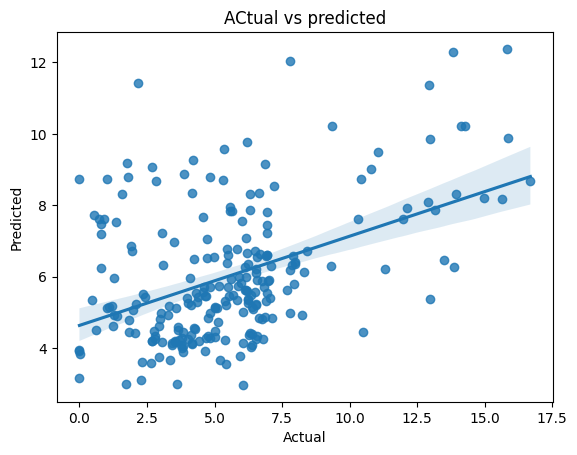

In [119]:
#Visualising
sns.regplot(x=Y_test, y=ada_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

# Ensemble Learning

In [120]:

stack_regressor = StackingRegressor(estimators=[('rf', regressor), ('xgb', xb_model)])
stack_regressor.fit(X_train, Y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [121]:
predictions = stack_regressor.predict(X_test)

In [122]:
print(predictions)

[ 5.54308082  5.62162033  5.567424    6.056794    6.99016925 10.48266402
  6.84420837  4.7274197   6.84257832  6.01226864  3.75551051  6.40254372
  4.72815167  4.15416661  7.04525516  4.81169853  8.58657726  3.92548417
  6.16377504  5.07709369  3.4341996   5.94555852  4.2591249  10.50566431
  8.35788451  7.24334044  6.44212082 11.17341922  6.9182492   6.93169242
  2.65921491  9.87518708  5.53915294 10.41101976  6.15136081  4.45788452
  3.73919214  6.36812609  4.0124903   4.92091019  5.74815012  6.09211843
  7.91592354  5.10070611  4.03349071  9.81944619  4.68474101  4.27848927
  5.82339438  4.29047026  5.96418212  2.51040997  4.28785125  4.93124705
  6.79201466  4.14436431  4.27317426  5.11715857  4.73564862  6.26646269
  4.4820449   8.18302053  3.50281742  5.5838061   5.55176339  4.84351783
  5.78931074  3.66095629  6.78519969  4.64020507  3.9803729   7.94005606
  6.82013892  3.84320596  6.59141991  9.28871788  5.5595919   5.30352762
  5.90451214 11.41076928  4.77316357  6.63334562  5

In [123]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [124]:
mean_absolute_error(Y_train, training_data_prediction)

0.8326666286560099

In [125]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.186474743814008

In [126]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8818764951298292


In [127]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 20.1158457090306


In [128]:
#Test Scores
mean_absolute_error(Y_test, predictions)

1.674211057910177

In [129]:
rms = sqrt(mean_squared_error(Y_test, predictions))

In [130]:
print(rms)

2.471837341058047


In [131]:
# R squared error
error_score = metrics.r2_score(Y_test, predictions)
print("R squared error : ", error_score)

R squared error :  0.44788906521721317


In [132]:
smape_score = smape(Y_test, predictions)
print("SMAPE score:", smape_score)

SMAPE score: 35.54372262021317


In [133]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [134]:
pred=stack_regressor.predict(X_test)

In [135]:
print(pred)

[ 5.41338757  5.66432155  6.22472738  5.99966864  7.61951888 10.01156763
  6.45262425  4.47637436  6.66433924  6.79909009  3.93445922  6.33555187
  4.48019251  4.41364857  7.23242088  4.9680567   8.76716347  4.22471088
  6.54762639  4.73736599  3.5775271   6.04697492  4.64949422 10.35113057
  8.35246738  7.0555122   6.5746034  11.73757937  6.98490543  6.75482391
  2.73857441 10.23435591  5.270249   10.55278176  6.03013398  4.52033132
  3.75223921  6.10327001  4.39404634  4.76832823  5.90771001  6.07432685
  8.13138508  4.7797562   3.9608292   9.56807301  4.54241804  4.15447277
  5.87664692  4.44009197  5.97564094  2.47144056  4.10005582  4.98499771
  6.57073275  4.98560003  4.42503494  4.83950233  4.54175854  6.39351926
  4.32935     7.78274914  3.79894399  6.17917145  5.34152787  4.45409607
  5.90180521  3.71755429  6.55910256  4.37356061  3.99502318  7.45175146
  6.682052    3.81260627  6.67363099  9.22715598  5.44970098  5.62573093
  6.27278282 11.84445095  5.02237998  7.20057023  5

In [136]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [137]:
mean_absolute_error(Y_train, training_data_prediction)

0.8930948544839111

In [138]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.277095981493813

In [139]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8631431923409623


In [140]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 20.96940190065191


In [141]:
#Test Scores
mean_absolute_error(Y_test, pred)

1.673042909423104

In [142]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [143]:
print(rms)

2.4753212085890954


In [144]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.44633165136322983


In [145]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 35.4040448921929


In [146]:
voting_reg = VotingRegressor(estimators=[('rf', regressor), ('svm', svr)])
voting_reg.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [147]:
Y_pred = voting_reg.predict(X_test)

In [148]:
print(Y_pred)

[ 5.49938592  5.68000362  5.60780197  6.0988828   6.7187694  11.41135675
  6.8894462   5.16312296  6.55642501  5.76690184  3.29138592  6.5325515
  4.47517245  4.2564154   7.39422262  5.24147957  8.22562185  3.72332916
  7.06317858  4.56706724  3.68473406  6.30855079  4.64385715 10.58023988
 10.03682338  7.01306625  6.61681316 11.71625268  6.97920768  6.92562378
  1.85331616 10.02014975  4.78557933 10.64775532  6.26225335  4.28967672
  3.68502451  6.0122717   4.17090996  4.02344134  5.76388131  6.5345698
  7.36733969  5.26775002  4.21134131  9.9250423   4.38802051  4.05714525
  5.2489591   3.61687211  5.95579432  2.60770283  3.9121683   5.33543759
  8.45758414  4.85428077  3.40106238  5.09414854  4.76388307  6.40875852
  4.5024297   9.39323219  2.42359699  5.28656344  5.31451327  5.27481351
  6.00791676  3.44481872  7.02026806  4.79934045  3.90551719  7.42768904
  6.99765426  3.20935829  6.4592711   9.08656032  6.05246814  5.16266074
  6.83469548 10.25929354  5.91295075  5.85880784  5.5

In [149]:
mean_absolute_error(Y_test, Y_pred)

1.7116625751387033

In [150]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [151]:
print(rms)

2.5444883943080163


In [152]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.41495736026378716


In [153]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 40.09579523123153


In [154]:
residuals = Y_test - test_data_prediction
n = len(X_test)
p = 1  # Assuming only one predictor variable
SSE = np.sum(residuals ** 2)
SE = np.sqrt(SSE / (n - p - 1))
print(SE)

2.4505136586993066


In [155]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor), ('xgb',xb_model),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('svm', SVR(C=10, gamma=0.1))])

In [156]:
predict = vote_regressor.predict(X_test)

In [157]:
print(predict)

[ 5.42133533  5.80395108  5.70545162  5.90583478  7.21168014 11.42749185
  7.20668333  5.05314906  6.41445872  4.63241414  3.33333819  6.75451531
  4.55546765  3.74713539  7.40544602  4.67264881  8.82258298  3.39741992
  6.57782783  5.03973969  3.49585724  6.49925637  4.73296029 10.89510644
  8.82730152  7.54459074  6.38159985 11.74273985  7.09824789  7.0676605
  2.0360289  10.32749575  5.03098976 10.85961126  6.53142969  4.05427448
  3.38577516  6.13360742  3.78524812  4.16500687  5.73313804  6.40749432
  7.96825511  5.20262575  4.37135696 10.29411176  4.51505081  4.16151586
  5.3472325   3.8276395   5.6857985   2.56239612  3.87503389  5.27361385
  8.5147676   4.72376284  3.68321356  5.04693173  4.6310603   6.40726719
  4.40258739  9.6231238   2.29003875  5.41320711  5.54309522  5.23324858
  6.14526158  3.37010722  7.09901322  4.71859705  3.76642035  7.47887966
  7.14373379  3.25598827  6.50990756  9.70067816  5.80172499  4.85558842
  6.24917488 10.71841545  5.1046088   5.95650471  5.

In [158]:
mean_absolute_error(Y_test, predict)

1.6664036462591907

In [159]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [160]:
print(rms)

2.493048096455967


In [161]:
# R squared error
error_score = metrics.r2_score(Y_test,predict)
print("R squared error : ", error_score)

R squared error :  0.43837311987664984


In [162]:
smape_score = smape(Y_test,predict)
print("SMAPE score:", smape_score)

SMAPE score: 35.47485410343159


In [163]:
residuals = Y_test - predict
n = len(X_test)
p = 1  # Assuming only one predictor variable
SSE = np.sum(residuals ** 2)
SE = np.sqrt(SSE / (n - p - 1))
print(SE)

2.503817252832659
